<a href="https://colab.research.google.com/github/Hildafibrianti/cicd-laravel/blob/master/Multiple_Linear_Regression_(_Pie_Sales_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
# Import Dataset
import pandas as pd
df = pd.read_csv ('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
df

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


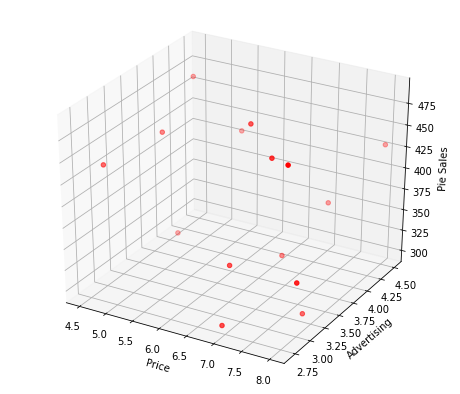

In [31]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mpl_toolkits import mplot3d
from sklearn import linear_model
 
# Creating dataset
z = df.loc[:,'pie_sales'].values
x = df.loc[:,'price'].values
y = df.loc[:,'advertising'].values

# Creating figure
fig = plt.figure(figsize = (8, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(x, y, z, color = "red")

ax.set_xlabel('Price')
ax.set_ylabel('Advertising')
ax.set_zlabel('Pie Sales')
  
# show plot
plt.show()
 


In [32]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
# Apply multiple Linear Regression
model = smf.ols(formula='pie_sales ~ price + advertising', data=df)
results_formula = model.fit()
results_formula.params

Intercept      306.526193
price          -24.975090
advertising     74.130957
dtype: float64

In [34]:
# Prepare the data for Visualization
x_surf, y_surf = np.meshgrid(np.linspace(df.price.min(), df.price.max(), 100),np.linspace(df.advertising.min(), df.advertising.max(), 100))
onlyX = pd.DataFrame({'price': x_surf.ravel(), 'advertising': y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)

In [35]:
# Convert the predicted result in an array
fittedY=np.array(fittedY)

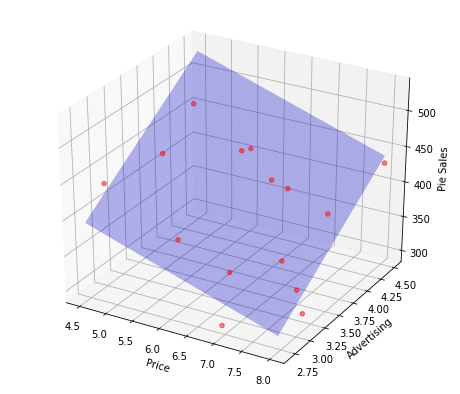

In [36]:
# Visualize the Data for Multiple Linear Regression
fig = plt.figure(figsize = (8, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['price'],df['advertising'],df['pie_sales'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='b', alpha=0.3)
ax.set_xlabel('Price')
ax.set_ylabel('Advertising')
ax.set_zlabel('Pie Sales')
plt.show()

In [38]:
X = sm.add_constant(X) # adding a constant

In [39]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Fri, 23 Oct 2020   Prob (F-statistic):             0.0120
Time:                        15:04:46   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        306.5262    114.254      2.683      0.0

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


Berdasarkan hasil OLS dapat diperoleh informasi sebagai berikut:
1.   R-squared

> Nilai R-squared 0.521 yang menandakan bahwa variabel indpenden yang digunakan dalam model mampu menjelaskan 52.1% variabel dependen.

2.   Uji F

> Ho : tidak ada pengaruh secara signifikan antara price dan advertising secara bersama-sama terhadap penjulan pie

> Ha : ada pengaruh secara signifikan antara price dan advertising secara bersama-sama terhadap penjulan pie.
- Ho diterima bila F hitung < F tabel
- Ho ditolak bila F hitung > F tabel

> Berdasarkan ols diperoleh f hitung sebesar 6.539 , dan untuk f tabel (dengan df1=2 dan df2=12) diperoleh 3.89. Nilai f hitung > f tabel (6.539 > 3.89 ) maka Ho ditolak. Artinya ada pengaruh yang signifikan antara price dan advertising secara bersama-sama terhadap penjulan pie.

3.   Uji T

> Ho : Secara parsial tidak ada pengaruh signifikan antara price/advertising dengan penjualan pie.

> Ha : Secara parsial ada pengaruh signifikan antara price/advertising dengan penjualan pie.
- Ho diterima bila -t tabel < t hitung < t tabel
- Ho ditolak bila t hitung < -t tabel atau t hitung > t tabel

> Berdasarkan ols diperoleh t hitung (price) sebesar -2.306 , dan untuk t tabel diperoleh 2.17881. Nilai t hitung < -t tabel ( -2.306 < -2.17881 ) maka Ho ditolak. Artinya Secara parsial ada pengaruh signifikan antara price dengan penjualan pie.

> Berdasarkan ols diperoleh t hitung (advertising) sebesar 2.855 , dan untuk t tabel diperoleh 2.17881. Nilai t hitung > t tabel ( 2.855 > 2.17881 ) maka Ho ditolak. Artinya Secara parsial ada pengaruh signifikan antara advertising dengan penjualan pie.





  
